# Topsis on Text Sentence Similarity

<div style="border: 2px solid #000; padding: 20px;">
    
#### Name: Ayun Neupane 

#### Roll NO: 102167007

#### Class : 3CS4

<div style="border: 2px solid #000; padding: 10px;">
    
# Model Evaluation and TOPSIS Score Analysis

## 1. Data Collection
- Fetched a subset of data from Hugging Face for model training.
- link :https://huggingface.co/datasets/nuvocare/WikiMedical_sentence_similarity/viewer/default/train

## 2. Model Training
- Trained five different models using the selected data subset.

## 3. Performance Evaluation
- Calculated the following metrics for each model:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Cohen's Kappa

## 4. TOPSIS Score Calculation
- Utilized the custom 'Topsis-Rohan-102103108' package to compute TOPSIS scores based on the model performance metrics.
- Link of my python pacakage : https://pypi.org/project/Topsis-Rohan-102103108/     

## 5. Visualization
- Plotted a bar graph to visually represent the TOPSIS scores of each model.

### Summary:
1. **Data Collection:**
   - Subset of data obtained from Hugging Face for training.

2. **Model Training:**
   - Five models trained on the selected data subset.

3. **Performance Evaluation:**
   - Metrics calculated: accuracy, precision, recall, F1 score, Cohen's Kappa.

4. **TOPSIS Score Calculation:**
   - Custom package used for TOPSIS score computation.
   - Link of my python pacakage : https://pypi.org/project/Topsis-Rohan-102103108/ 

5. **Visualization:**
   - Bar graph illustrating the TOPSIS scores of each model.


## Importing Necessary Libraries

In [1]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from scipy.stats import pearsonr

## Loading Dataset From Hugging Face Website

In [2]:
from datasets import load_dataset
import pandas as pd

# Load the dataset
dataset = load_dataset("nuvocare/WikiMedical_sentence_similarity", split="train")

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset)

# Filter rows based on label
label_0_rows = df[df['label'] == 0].head(1600)
label_1_rows = df[df['label'] == 1].head(1600)

# Concatenate the selected rows
train_dataset = pd.concat([label_0_rows, label_1_rows])

# Shuffle the dataset to mix the rows
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the resulting train dataset
print(train_dataset.head())


Found cached dataset parquet (C:/Users/DELL/.cache/huggingface/datasets/nuvocare___parquet/nuvocare--WikiMedical_sentence_similarity-0e7cc52b5c6632e2/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


                                               text1  \
0  Although few studies have been done to link th...   
1  A decreased respiratory drive can also be the ...   
2  Body-focused repetitive behavior (BFRB) is an ...   
3  Other symptoms\nBesides lack of speech, other ...   
4  PTH up-regulates 25-hydroxyvitamin D3 1-alpha-...   

                                               text2  label  
0  Facial symmetry is one specific measure of bod...      0  
1  Exercise\nExercise-induced arterial hypoxemia ...      1  
2  However, no treatment was deemed well-establis...      1  
3  Post-secondary accommodations are also availab...      1  
4  The level may be stated in pg/dL or pmol/L (so...      1  


In [3]:
train_dataset

,text1,text2,label
0,Although few studies have been done to link th...,Facial symmetry is one specific measure of bod...,0
1,A decreased respiratory drive can also be the ...,Exercise\nExercise-induced arterial hypoxemia ...,1
2,Body-focused repetitive behavior (BFRB) is an ...,"However, no treatment was deemed well-establis...",1
3,"Other symptoms\nBesides lack of speech, other ...",Post-secondary accommodations are also availab...,1
4,PTH up-regulates 25-hydroxyvitamin D3 1-alpha-...,The level may be stated in pg/dL or pmol/L (so...,1
...,...,...,...
3195,Neurocognitive and behavioral consequences\nNo...,The stage of a lymphoma helps predict a patien...,0
3196,The syndromes symptoms were further refined in...,Treatment\nTreatment of the cause of the expos...,0
3197,Diagnosis\nDiagnosis of CSF leakage can be don...,Iliopsoas bursitis is inflammation of a bursa ...,0
3198,Patellofemoral pain syndrome (PFPS; not to be ...,The explosive power of nitroglycerin derives f...,0


In [4]:
import nltk

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preprocessing 

In [5]:

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [6]:
train_dataset['text1'] = train_dataset['text1'].apply(preprocess_text)
train_dataset['text2'] = train_dataset['text2'].apply(preprocess_text)

In [7]:
print(train_dataset.head(10))

                                               text1  \
0  although study done link gene known involved h...   
1  decreased respiratory drive also result metabo...   
2  bodyfocused repetitive behavior bfrb umbrella ...   
3  symptom besides lack speech common behavior ch...   
4  pth upregulates 25hydroxyvitamin d3 1alphahydr...   
5  longitudinal natural history study nearly 20 p...   
6  however use gold application electronic slidin...   
7  daniel hauser whose mother fled 2009 order pre...   
8  firearmrelated death common male age 20 24 yea...   
9  oxytocin added institute safe medication pract...   

                                               text2  label  
0  facial symmetry one specific measure bodily sy...      0  
1  exercise exerciseinduced arterial hypoxemia oc...      1  
2  however treatment deemed wellestablished treat...      1  
3  postsecondary accommodation also available peo...      1  
4  level may stated pgdl pmoll sometimes abbrevia...      1  
5  march 20

## Training five model and calculating their parameters

In [8]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(train_dataset, test_size=0.2, random_state=42)

In [9]:
from tqdm import tqdm

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from tqdm import tqdm
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

def evaluate_model(model, tokenizer, df, batch_size=8):
    num_samples = len(df)
    accuracy_list, precision_list, recall_list, f1_list, kappa_list = [], [], [], [], []

    with tqdm(total=num_samples, desc="Evaluating") as pbar:
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)

            inputs = tokenizer(
                df['text1'][start:end].tolist(),
                df['text2'][start:end].tolist(),
                return_tensors='pt',
                padding=True,
                truncation=True
            )
            labels = df['label'][start:end].values

            with torch.no_grad():
                outputs = model(**inputs)

            predictions = torch.argmax(outputs.logits, dim=1).cpu().numpy()

            # Update evaluation metrics for each batch
            accuracy = accuracy_score(labels, predictions)
            precision = precision_score(labels, predictions)
            recall = recall_score(labels, predictions)
            f1 = f1_score(labels, predictions)
            kappa = cohen_kappa_score(labels, predictions)

            accuracy_list.append(accuracy)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)
            kappa_list.append(kappa)

            pbar.update(end - start)

    # Compute average metrics
    accuracy = sum(accuracy_list) / len(accuracy_list)
    precision = sum(precision_list) / len(precision_list)
    recall = sum(recall_list) / len(recall_list)
    f1 = sum(f1_list) / len(f1_list)
    mean_kappa = sum(kappa_list) / len(kappa_list)

    results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cohen_kappa': mean_kappa
    }

    return results

# Define the models
models = {
    'bert-base-uncased': 'bert-base-uncased',
    'distilbert-base-uncased': 'distilbert-base-uncased',
    'roberta-base': 'roberta-base',
    'xlnet-base-cased': 'xlnet-base-cased',
    'albert-base-v2': 'albert-base-v2',
}

# Store results for each model
results_dict = {}

# Evaluate each model
for model_name, model_key in models.items():
    # Load model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(model_key)
    tokenizer = AutoTokenizer.from_pretrained(model_key)

    # Evaluate the model
    results = evaluate_model(model, tokenizer, test_df)
    
    # Store results in the dictionary
    results_dict[model_name] = results

    # Print evaluation results
    print(f"{model_name}:")
    print(f"Accuracy: {results['accuracy']:.4f}, Precision: {results['precision']:.4f}, Recall: {results['recall']:.4f}, F1 Score: {results['f1']:.4f}")
    print(f"Cohen's Kappa: {results['cohen_kappa']:.4f}\n")

# Access results_dict to get the evaluation results for each model
print(results_dict)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|████████████████████████████████████████████████████████████████████| 640/640 [10:01<00:00,  1.06it/s]


bert-base-uncased:
Accuracy: 0.8281, Precision: 0.8513, Recall: 0.7818, F1 Score: 0.7999
Cohen's Kappa: 0.6081



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:   0%|                                                                              | 0/640 [00:00<?, ?it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:   1%|▉                                                                     | 8/640 [00:02<03:52,  2.72it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision

Evaluating:  24%|████████████████▏                                                   | 152/640 [01:12<03:43,  2.18it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:  25%|█████████████████                                                   | 160/640 [01:16<03:42,  2.16it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:  26%|█████████████████▊                                                  | 168/640 [01:20<03:40,  2.14it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics

Evaluating:  49%|█████████████████████████████████▏                                  | 312/640 [02:30<02:43,  2.00it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:  50%|██████████████████████████████████                                  | 320/640 [02:34<02:39,  2.00it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:  51%|██████████████████████████████████▊                                 | 328/640 [02:38<02:38,  1.97it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics

Evaluating:  76%|███████████████████████████████████████████████████▊                | 488/640 [03:56<01:14,  2.04it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:  78%|████████████████████████████████████████████████████▋               | 496/640 [03:59<01:09,  2.07it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:  79%|█████████████████████████████████████████████████████▌              | 504/640 [04:03<01:05,  2.07it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics

distilbert-base-uncased:
Accuracy: 0.4922, Precision: 0.0125, Recall: 0.0031, F1 Score: 0.0050
Cohen's Kappa: -0.0002



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  31%|█████████████████████▎                                              | 200/640 [02:56<06:15,  1.17it/s]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
Evaluating: 100%|████████████████████████████████████████████████████████████████████| 640/640 [12:40<00:00,  1.19s/it]


roberta-base:
Accuracy: 0.5078, Precision: 0.5078, Recall: 1.0000, F1 Score: 0.6568
Cohen's Kappa: nan



Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating:  21%|██████████████▍                                                     | 136/640 [09:16<33:17,  3.96s/it]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Evaluating:  88%|███████████████████████████████████████████████████████████▌        | 560/640 [38:44<05:30,  4.14s/it]C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

xlnet-base-cased:
Accuracy: 0.5391, Precision: 0.5386, Recall: 0.4451, F1 Score: 0.4503
Cohen's Kappa: 0.0577



Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|████████████████████████████████████████████████████████████████████| 640/640 [23:17<00:00,  2.18s/it]

albert-base-v2:
Accuracy: 0.2984, Precision: 0.3543, Recall: 0.4485, F1 Score: 0.3681
Cohen's Kappa: -0.3244

{'bert-base-uncased': {'accuracy': 0.828125, 'precision': 0.8513392857142856, 'recall': 0.7818452380952378, 'f1': 0.7998528554778549, 'cohen_kappa': 0.6080987394957986}, 'distilbert-base-uncased': {'accuracy': 0.4921875, 'precision': 0.0125, 'recall': 0.003125, 'f1': 0.005, 'cohen_kappa': -0.00016447368421052544}, 'roberta-base': {'accuracy': 0.5078125, 'precision': 0.5078125, 'recall': 1.0, 'f1': 0.656782939282939, 'cohen_kappa': nan}, 'xlnet-base-cased': {'accuracy': 0.5390625, 'precision': 0.5386309523809525, 'recall': 0.4451190476190476, 'f1': 0.450252525252525, 'cohen_kappa': 0.057700721835783744}, 'albert-base-v2': {'accuracy': 0.2984375, 'precision': 0.354315476190476, 'recall': 0.44849702380952383, 'f1': 0.368086219336219, 'cohen_kappa': -0.32437776112776123}}


## Making CSV File for the calculated parameters

In [11]:
# Convert results_dict to a DataFrame
results_df = pd.DataFrame(results_dict).T

# Save DataFrame to a CSV file
results_df.to_csv('Final_results.csv')

# Access results_df to get the evaluation results for each model
print(results_df)

                         accuracy  precision    recall        f1  cohen_kappa
bert-base-uncased        0.828125   0.851339  0.781845  0.799853     0.608099
distilbert-base-uncased  0.492188   0.012500  0.003125  0.005000    -0.000164
roberta-base             0.507812   0.507812  1.000000  0.656783          NaN
xlnet-base-cased         0.539062   0.538631  0.445119  0.450253     0.057701
albert-base-v2           0.298438   0.354315  0.448497  0.368086    -0.324378


## using my Topsis pacakage for calculating topsis score

In [12]:
!pip install Topsis-Rohan-102103108


  Obtaining dependency information for Topsis-Rohan-102103108 from https://files.pythonhosted.org/packages/b8/20/6a1464a97765ee7a83b2b75caea30a2fab07cf862bc500421b10a337485c/Topsis_Rohan_102103108-1.1.2-py3-none-any.whl.metadata


In [19]:
!topsis Final_results.csv "1,1,1,1,1" "+,+,+,+,+" output.csv


Topsis
TOPSIS analysis completed. Output saved to output.csv


In [20]:
ans=pd.read_csv('output.csv')

In [21]:
ans

,Unnamed: 0,accuracy,precision,recall,f1,cohen_kappa,Topsis Score,Rank
0,bert-base-uncased,0.828125,0.851339,0.781845,0.799853,0.608099,0.078631,5.0
1,distilbert-base-uncased,0.492188,0.012500,0.003125,0.005000,-0.000164,0.754064,1.0
2,roberta-base,0.507812,0.507812,1.000000,0.656783,NaN,0.288608,4.0
3,xlnet-base-cased,0.539062,0.538631,0.445119,0.450253,0.057701,0.530906,3.0
4,albert-base-v2,0.298438,0.354315,0.448497,0.368086,-0.324378,0.749069,2.0


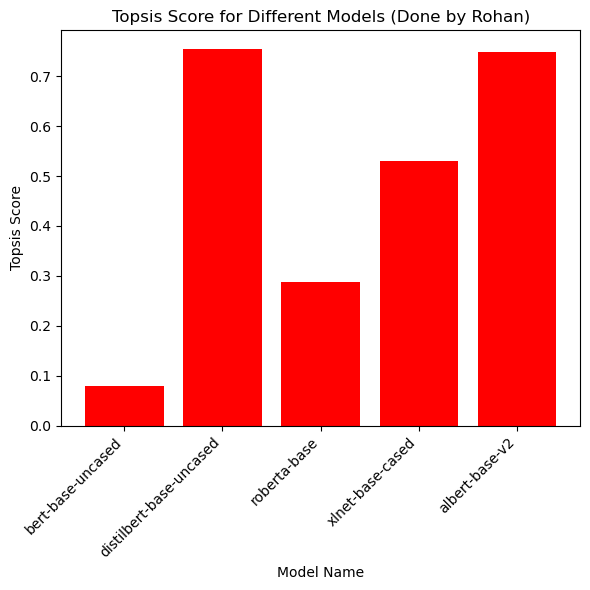

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'FinalAnswer'
model_names = ans['Unnamed: 0']
topsis_scores = ans['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(6, 6))
plt.bar(model_names, topsis_scores, color='Red')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score for Different Models (Done by Rohan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
## so distilbert-base-uncased and bert-base-uncased works better for text sentence similarity